In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [2]:
file_names = os.listdir()
file_names

['EDA.ipynb',
 '2022_season_catchshoot.xlsx',
 '2022_speed_distance.xlsx',
 '2022_usage.xlsx',
 '2022_passes.xlsx',
 '2022_season_drives.xlsx',
 '2022_pullup.xlsx',
 '.ipynb_checkpoints',
 '2022_touches.xlsx']

In [3]:
df = pd.read_excel('2022_speed_distance.xlsx')
cols = df.columns.tolist()
cols = [item.replace('\xa0', ' ') for item in cols]
df.columns = cols
df.head()

,PLAYER,TEAM,GP,W,L,MIN,DIST. FEET,DIST. MILES,DIST. MILES OFF,DIST. MILES DEF,AVG SPEED,AVG SPEED OFF,AVG SPEED DEF
0,Aaron Gordon,DEN,75,46,29,31.7,11717.0,2.22,1.18,1.04,4.00,4.19,3.81
1,Aaron Henry,PHI,6,6,0,2.8,1203.2,0.23,0.12,0.11,4.39,4.23,3.91
2,Aaron Holiday,PHX,63,34,29,16.2,6371.2,1.21,0.64,0.57,4.28,4.48,4.09
3,Aaron Nesmith,BOS,52,32,20,11.0,4439.1,0.84,0.44,0.40,4.34,4.58,4.12
4,Aaron Wiggins,OKC,50,13,37,24.2,10189.7,1.93,1.01,0.92,4.59,4.96,4.24


In [4]:
df = df[df['MIN'] > 15]

In [5]:
df['distance_off_frac'] = df['DIST. MILES OFF'] / df['DIST. MILES']
df['distance_def_frac'] = 1-df['distance_off_frac']
df.head()

,PLAYER,TEAM,GP,W,L,MIN,DIST. FEET,DIST. MILES,DIST. MILES OFF,DIST. MILES DEF,AVG SPEED,AVG SPEED OFF,AVG SPEED DEF,distance_off_frac,distance_def_frac
0,Aaron Gordon,DEN,75,46,29,31.7,11717.0,2.22,1.18,1.04,4.00,4.19,3.81,0.531532,0.468468
2,Aaron Holiday,PHX,63,34,29,16.2,6371.2,1.21,0.64,0.57,4.28,4.48,4.09,0.528926,0.471074
4,Aaron Wiggins,OKC,50,13,37,24.2,10189.7,1.93,1.01,0.92,4.59,4.96,4.24,0.523316,0.476684
9,Al Horford,BOS,68,46,22,29.0,10608.1,2.01,1.08,0.93,3.95,4.24,3.67,0.537313,0.462687
10,Alec Burks,NYK,80,36,44,28.5,10871.5,2.06,1.08,0.97,4.05,4.19,3.90,0.524272,0.475728


<AxesSubplot:xlabel='distance_off_frac', ylabel='distance_def_frac'>

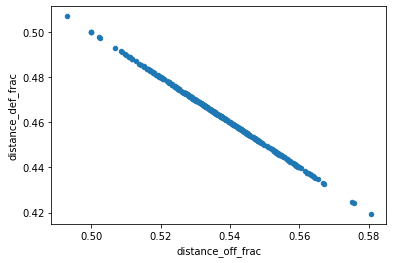

In [6]:
df.plot.scatter(x='distance_off_frac',y='distance_def_frac')

<AxesSubplot:xlabel='MIN', ylabel='DIST. MILES'>

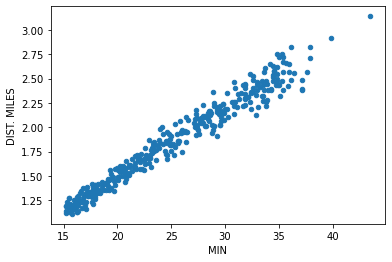

In [10]:
df.plot.scatter('MIN','DIST. MILES')

In [11]:
usage_df = pd.read_excel('2022_usage.xlsx').drop(['Unnamed: 0'],axis=1)
usage_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS
0,Ahmad Caver,IND,25,1,0,1,1,50.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
1,Malik Newman,CLE,25,1,0,1,8,43.8,75.0,41.7,0.0,25.0,100.0,50.0,0.0,16.7,11.1,33.3,50.0,0.0,0.0,0.0,0.0,33.3,72.7
2,Matt Mooney,NYK,27,1,1,0,2,40.0,0.0,33.3,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
3,Joel Embiid,PHI,28,68,45,23,2296,37.5,35.6,34.3,16.9,17.5,60.7,61.4,45.3,39.4,40.4,24.7,39.6,22.4,40.4,42.7,21.8,58.0,38.7
4,Luka Doncic,DAL,23,65,44,21,2301,36.8,34.1,34.9,30.2,30.5,44.8,45.6,12.5,33.7,29.1,52.4,48.3,23.4,18.4,29.1,16.0,41.4,35.3


In [12]:
df = df.merge(usage_df,left_on='PLAYER',right_on='PLAYER',how='inner')
df.head()

,PLAYER,TEAM_x,GP_x,W_x,L_x,MIN_x,DIST. FEET,DIST. MILES,DIST. MILES OFF,DIST. MILES DEF,AVG SPEED,AVG SPEED OFF,AVG SPEED DEF,distance_off_frac,distance_def_frac,TEAM_y,AGE,GP_y,W_y,L_y,MIN_y,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS
0,Aaron Gordon,DEN,75,46,29,31.7,11717.0,2.22,1.18,1.04,4.00,4.19,3.81,0.531532,0.468468,DEN,26,75,46,29,2375,19.4,20.1,19.6,15.5,16.3,19.7,21.1,28.3,17.8,19.9,12.8,19.1,13.6,25.4,24.0,17.2,19.9,19.6
1,Aaron Holiday,PHX,63,34,29,16.2,6371.2,1.21,0.64,0.57,4.28,4.48,4.09,0.528926,0.471074,PHX,25,63,34,29,1021,18.2,18.0,18.3,17.7,15.4,16.3,14.8,11.5,13.3,12.9,30.1,24.1,28.2,8.3,19.1,21.0,17.2,17.7
2,Aaron Wiggins,OKC,50,13,37,24.2,10189.7,1.93,1.01,0.92,4.59,4.96,4.24,0.523316,0.476684,OKC,23,50,13,37,1209,14.9,15.9,15.3,13.7,15.3,15.8,16.7,21.0,14.2,15.6,11.6,15.6,15.7,9.9,14.9,19.6,14.8,15.6
3,Al Horford,BOS,68,46,22,29.0,10608.1,2.01,1.08,0.93,3.95,4.24,3.67,0.537313,0.462687,BOS,36,69,46,23,2005,14.7,15.4,15.7,16.6,17.3,12.5,11.9,26.9,28.5,28.1,21.4,12.5,17.0,39.3,7.7,18.1,11.1,15.2
4,Alec Burks,NYK,80,36,44,28.5,10871.5,2.06,1.08,0.97,4.05,4.19,3.90,0.524272,0.475728,NYK,30,81,37,44,2318,17.1,15.8,17.6,24.9,22.5,23.1,21.4,8.2,21.2,17.8,23.0,14.6,23.8,11.4,12.0,21.1,23.9,18.2


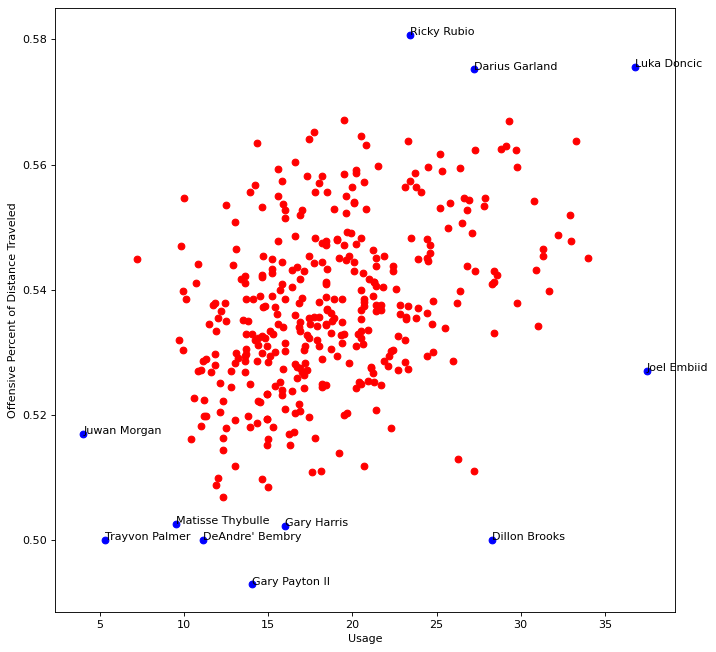

In [22]:
fs = 10

highlight = df[(df['USG%'] > 35) | (df['distance_off_frac']<0.505) | 
                              (df['distance_off_frac']>0.57) | (df['USG%'] < 5)]
players_highlighted = highlight.PLAYER.tolist()
non_highlight = df[~df['PLAYER'].isin(players_highlighted)]
plt.figure(figsize=(fs, fs), dpi=80)

plt.scatter(non_highlight['USG%'], non_highlight['distance_off_frac'], c='red',label='League')
plt.scatter(highlight['USG%'], highlight['distance_off_frac'],  c='blue')

for i in range(highlight.shape[0]):
    plt.annotate(highlight['PLAYER'].tolist()[i], (highlight['USG%'].tolist()[i], highlight['distance_off_frac'].tolist()[i]))
plt.xlabel('Usage')
plt.ylabel('Offensive Percent of Distance Traveled')
plt.show()


In [60]:
passes_df = pd.read_excel('2022_passes.xlsx')
passes_df = passes_df[passes_df['MIN'] > 10]
passes_df = passes_df[passes_df['GP'] > 10]
passes_df.head()

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ
0,Aaron Gordon,DEN,75,46,29,31.7,26.9,30.4,2.5,0.5,4.4,6.1,3.2,9.3,11.8
2,Aaron Holiday,PHX,63,34,29,16.2,23.5,25.8,2.4,0.4,4.8,6.3,3.0,10.3,13.0
3,Aaron Nesmith,BOS,52,32,20,11.0,10.9,8.3,0.4,0.1,0.9,0.9,0.5,3.9,4.6
4,Aaron Wiggins,OKC,50,13,37,24.2,16.1,17.7,1.4,0.1,2.6,3.4,1.5,8.4,9.6
5,Abdel Nader,PHX,14,11,3,10.4,5.9,6.0,0.5,0.0,0.9,1.4,0.5,8.4,8.4


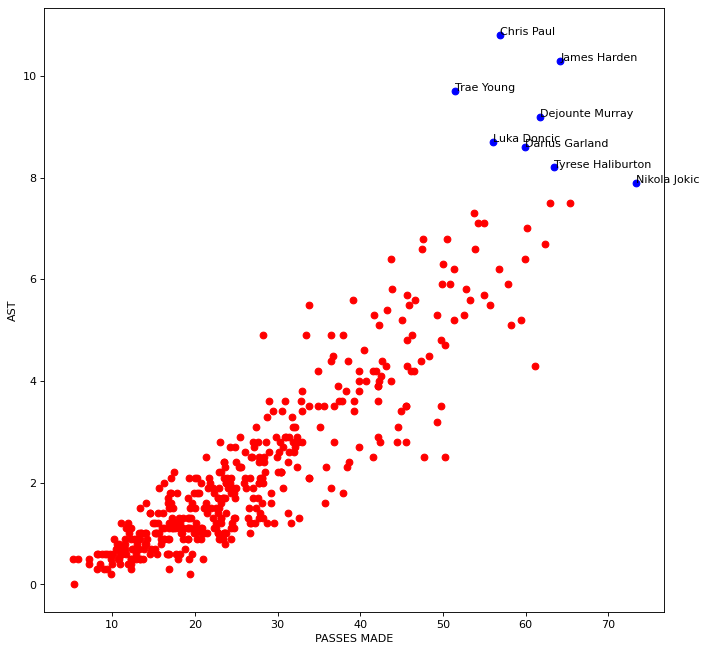

In [61]:
fs = 10

highlight = passes_df[passes_df['AST']>7.5]
players_highlighted = highlight.PLAYER.tolist()
non_highlight = passes_df[~passes_df['PLAYER'].isin(players_highlighted)]
plt.figure(figsize=(fs, fs), dpi=80)

plt.scatter(non_highlight['PASSES MADE'], non_highlight['AST'], c='red',label='League')
plt.scatter(highlight['PASSES MADE'], highlight['AST'],  c='blue')


for i in range(highlight.shape[0]):
    plt.annotate(highlight['PLAYER'].tolist()[i], (highlight['PASSES MADE'].tolist()[i], highlight['AST'].tolist()[i]))
plt.xlabel('PASSES MADE')
plt.ylabel('AST')
plt.show()

In [62]:
passes_df['AST/PASS'] = passes_df['AST'] / passes_df['PASSES MADE']

In [63]:
passes_df.sort_values(['AST/PASS'],ascending=False)

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ,AST/PASS
87,Chris Paul,PHX,64,52,12,32.9,56.9,61.9,10.8,1.0,19.6,27.2,13.1,19.0,23.0,0.189807
553,Trae Young,ATL,76,40,36,34.9,51.5,72.2,9.7,1.0,17.2,24.1,11.6,18.8,22.6,0.188350
150,Devin Booker,PHX,67,55,12,34.5,28.2,47.3,4.9,0.8,8.4,11.8,5.7,17.2,20.2,0.173759
400,Markelle Fultz,ORL,18,6,12,20.0,33.8,41.8,5.5,0.3,10.8,14.6,6.3,16.3,18.8,0.162722
258,James Harden,PHI,65,40,25,37.2,64.2,73.8,10.3,1.0,18.4,25.7,12.4,16.0,19.3,0.160436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Mitchell Robinson,NYK,71,31,40,25.7,21.0,10.8,0.5,0.1,0.9,1.4,0.7,2.6,3.3,0.023810
176,Enes Freedom,BOS,34,20,14,11.8,9.8,6.5,0.2,0.1,0.5,0.6,0.3,2.4,3.0,0.020408
84,Chris Boucher,TOR,80,48,32,21.1,16.9,13.8,0.3,0.1,0.8,0.8,0.4,1.8,2.4,0.017751
396,Mamadi Diakite,OKC,13,4,9,14.4,19.4,12.8,0.2,0.0,0.4,0.4,0.2,0.8,0.8,0.010309


In [64]:
passes_df = passes_df.merge(usage_df[['PLAYER','USG%']],left_on='PLAYER',right_on='PLAYER',how='inner')
passes_df.head()

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ,AST/PASS,USG%
0,Aaron Gordon,DEN,75,46,29,31.7,26.9,30.4,2.5,0.5,4.4,6.1,3.2,9.3,11.8,0.092937,19.4
1,Aaron Holiday,PHX,63,34,29,16.2,23.5,25.8,2.4,0.4,4.8,6.3,3.0,10.3,13.0,0.102128,18.2
2,Aaron Nesmith,BOS,52,32,20,11.0,10.9,8.3,0.4,0.1,0.9,0.9,0.5,3.9,4.6,0.036697,16.4
3,Aaron Wiggins,OKC,50,13,37,24.2,16.1,17.7,1.4,0.1,2.6,3.4,1.5,8.4,9.6,0.086957,14.9
4,Abdel Nader,PHX,14,11,3,10.4,5.9,6.0,0.5,0.0,0.9,1.4,0.5,8.4,8.4,0.084746,13.9


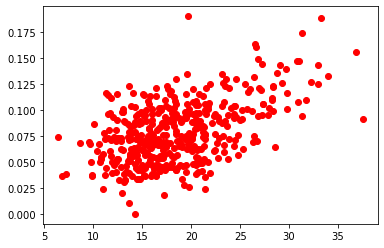

In [65]:
plt.scatter(passes_df['USG%'], passes_df['AST/PASS'], c='red',label='League')

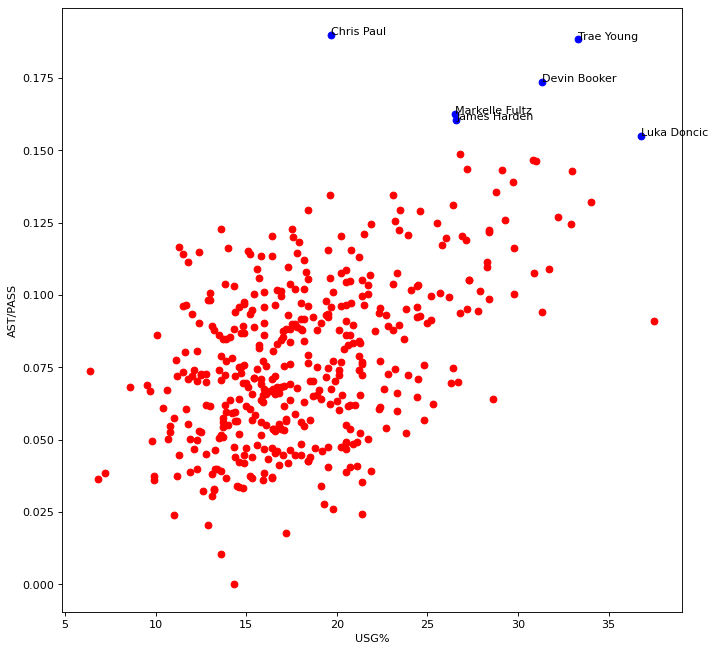

In [66]:
fs = 10

highlight = passes_df[(passes_df['AST/PASS']>0.15)]
players_highlighted = highlight.PLAYER.tolist()
non_highlight = passes_df[~passes_df['PLAYER'].isin(players_highlighted)]
plt.figure(figsize=(fs, fs), dpi=80)

plt.scatter(non_highlight['USG%'], non_highlight['AST/PASS'], c='red',label='League')
plt.scatter(highlight['USG%'], highlight['AST/PASS'],  c='blue')


for i in range(highlight.shape[0]):
    plt.annotate(highlight['PLAYER'].tolist()[i], (highlight['USG%'].tolist()[i], highlight['AST/PASS'].tolist()[i]))
plt.xlabel('USG%')
plt.ylabel('AST/PASS')
plt.show()

In [67]:
highlight

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ,AST/PASS,USG%
61,Chris Paul,PHX,64,52,12,32.9,56.9,61.9,10.8,1.0,19.6,27.2,13.1,19.0,23.0,0.189807,19.7
111,Devin Booker,PHX,67,55,12,34.5,28.2,47.3,4.9,0.8,8.4,11.8,5.7,17.2,20.2,0.173759,31.3
186,James Harden,PHI,65,40,25,37.2,64.2,73.8,10.3,1.0,18.4,25.7,12.4,16.0,19.3,0.160436,26.6
282,Luka Doncic,DAL,65,44,21,35.4,56.1,70.4,8.7,1.3,17.0,22.6,10.8,15.6,19.2,0.155080,36.8
294,Markelle Fultz,ORL,18,6,12,20.0,33.8,41.8,5.5,0.3,10.8,14.6,6.3,16.3,18.8,0.162722,26.5
401,Trae Young,ATL,76,40,36,34.9,51.5,72.2,9.7,1.0,17.2,24.1,11.6,18.8,22.6,0.188350,33.3
